<a href="https://colab.research.google.com/github/ngoclesydney/Google-Colab/blob/master/ML_start_on_3_01_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 2]
 [ 7]
 [ 9]
 [ 3]
 [10]
 [ 6]
 [ 1]
 [ 8]]

[[ 2  1]
 [ 7  1]
 [ 9  1]
 [ 3  1]
 [10  1]
 [ 6  1]
 [ 1  1]
 [ 8  1]]

[[13]
 [35]
 [41]
 [19]
 [45]
 [28]
 [10]
 [55]]

Ve do thi du lieu training X0 va Y: phai cung chieu ma tran



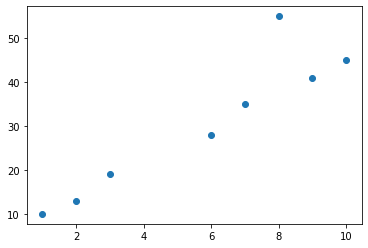

1. Dung phuong phap normal equation
[[4.40880503]
 [5.39937107]]
Vay ta co ham du doan predict hay con goi la ham hoi quy nhu sau:
Y=[4.40880503]X+[5.39937107]


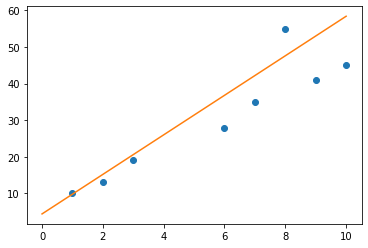


2. Dung phuong phap Gradient Descent
34.368124437949184
18.056331620952683
17.78962971076948
17.771916576699148
17.758188348099875
17.744643819765248
17.731222929359365
17.717923650910418
17.704744868525243
17.691685490251892
17.678744434246415
17.66592062847005
17.653213010597113
17.640620527926927
17.62814213729665
17.61577680499482
17.60352350667575
17.591381227274663
17.579348960923603
17.567425710868108
17.555610489384637
17.54390231769875
17.532300225904024
17.520803252881727
17.509410446221153
17.498120862140762
17.486933565409984
17.475847629271748
17.464862135365706
17.45397617365215
17.44318884233665
17.43249924779531
17.42190650450078
17.411409734948858
17.401008069585835
17.39070064673644
17.38048661253247
17.370365120842024
17.360335333199476
17.350396418735937
17.340547554110497
17.330787923441953
17.321116718241264
17.311533137344583
17.302036386846858
17.29262568003608
17.283300237328106
17.27405928620209
17.264902061136468
17.255827803545564
17.246835761716746
17.2379

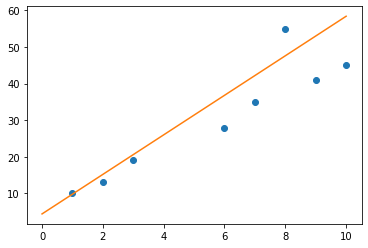

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Function for polynomial display
# We do not need pay much attention on this part
def plot_polynomial(xmin, xmax, coef, color='C1'):
    #xs is an array of evenly spaced numbers between xmin and xmax
    xs = np.linspace(xmin, xmax, num=500)
    
    #ys is an array, each element is computed as a polynomial function of
    #the corresponding element of xs
    ys = np.zeros_like(xs)
    for p, c in enumerate(coef.flatten()):
        ys += c*np.power(xs, p)
    plt.plot(xs, ys, color=color)
X0 = np.array([[2], [7], [9], [3], [10], [6], [1], [8]])
print(X0)
print()
ones = np.ones_like(X0)
# Nối 2 vector/ma trận theo chiều dọc
X = np.concatenate((X0, ones), axis=1)
print(X)
print()
Y = np.array([[13], [35], [41], [19], [45], [28], [10], [55]])
print(Y)
print()
print('Ve do thi du lieu training X0 va Y: phai cung chieu ma tran')
print()
plt.scatter(X0,Y); plt.show()
print('1. Dung phuong phap normal equation')
#Tính trực tiếp bằng công thức: theta=(XtransposeX)-1*Xtranspose*y
# API np.linalg.inv() dùng để tính ma trận nghịch đảo
theta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
print(theta)
print('Vay ta co ham du doan predict hay con goi la ham hoi quy nhu sau:')
print(f"Y={theta[0]}X+{theta[1]}")
# See how it fits:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta)
plt.show()
print()
print('2. Dung phuong phap Gradient Descent')
theta_gd = np.random.normal(size=2).reshape([2,1])
learning_rate = 0.02
m=X.shape[0]
grad_value=0
def grad_cal(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """    
    g = 1/m * X.T.dot(X.dot(theta_gd) - Y)
    return g.reshape(theta_gd.shape)

def loss(X, Y, theta_gd, m):
    """
    X: X's value
    Y: Y's value
    theta_gd: theta's value
    m: number of samples
    """
    return 1/(2*m) * np.sum((X.dot(theta_gd) - Y)**2)
for i in range(10000):
    grad_value = grad_cal(X, Y, theta_gd, m)
    theta_gd = theta_gd - learning_rate*grad_value
    print(loss(X, Y, theta_gd, m))
print(theta_gd)
# See how it fits:
plt.scatter(X0, Y)
plot_polynomial(0, 10, theta_gd)
plt.show()